In [133]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [36]:
# Create the dataset
n_samples = 1000


X, y = make_moons(n_samples,
                  noise=0.03,
                 random_state=42)


In [37]:
#Visualize the dataset in a dataframe
moons = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
moons

,X0,X1,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0
...,...,...,...
995,0.793018,0.591402,0
996,-0.138777,0.968000,0
997,1.653915,-0.291798,1
998,-0.934102,0.353582,0


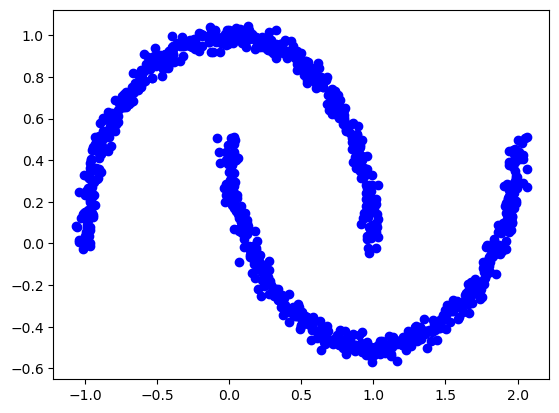

In [38]:
#Visualize the dataset in a plot
plt.scatter(X[:,0], X[:,1], c='blue')
plt.show()

In [50]:
#Split the dataset into training and test
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
# Check the shape of the data
train_data[0], train_label[0]

(array([-0.10379457,  1.00601564]), array([ 0.51717252, -0.37846148]))

### The main thing to note about the shape of our data is that it comes in a (1,2) array so the input and output shape should be the same size

In [52]:
# Check the min/max of the data

train_data[:,0].min(), train_data[:,0].max(), train_data[:,1].min(), train_data[:,1].max()

(-1.061750818658048,
 2.0637997808877993,
 -0.5716971982171706,
 1.042676886779827)

In [53]:
# The data isn't properly normalized so we will reduce the scale to increase the accuracy of the NN

train_data_norm = train_data/train_data.max()
test_data_norm = test_data/test_data.max()


In [54]:
train_data_norm.shape, train_labels.shape

((700, 2), (700,))

In [55]:
# Create the model

model_1 = keras.Sequential([
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss=keras.losses.BinaryCrossentropy(),
               optimizer=keras.optimizers.Adam(),
               metrics=['accuracy'])

model_1.fit(train_data_norm, train_labels, epochs=40)

Epoch 1/40
22/22 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5357
Epoch 2/40
22/22 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.5929
Epoch 3/40
22/22 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.8214
Epoch 4/40
22/22 [==============================] - 0s 2ms/step - loss: 0.6422 - accuracy: 0.8700
Epoch 5/40
22/22 [==============================] - 0s 2ms/step - loss: 0.6181 - accuracy: 0.8743
Epoch 6/40
22/22 [==============================] - 0s 2ms/step - loss: 0.5911 - accuracy: 0.8700
Epoch 7/40
22/22 [==============================] - 0s 2ms/step - loss: 0.5617 - accuracy: 0.8643
Epoch 8/40
22/22 [==============================] - 0s 2ms/step - loss: 0.5303 - accuracy: 0.8614
Epoch 9/40
22/22 [==============================] - 0s 2ms/step - loss: 0.4981 - accuracy: 0.8629
Epoch 10/40
22/22 [==============================] - 0s 2ms/step - loss: 0.4664 - accuracy: 0.8614
Epoch 11/40
22/22 [

In [56]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:,0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                             np.linspace(y_min, y_max, 100))
    #Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] #Stack 2d arrays together
        
        #make predictions
    y_pred = model.predict(x_in)
        
        #Check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
        
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
        #Plot the decision boundary
    plt.contour(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

Doing binary classification


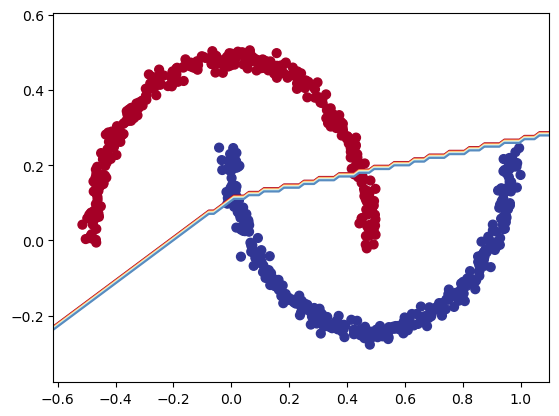

In [57]:
plot_decision_boundary(model_1, train_data_norm, train_labels)

# As we can see the model predicts fairly well, but the line representing predictions doesn't fit the data optimally

### Experiments to try:
1. Train longer
2. Change the output activation
3. Change the learning rate

In [59]:
# Create the model

model_2 = keras.Sequential([
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss=keras.losses.BinaryCrossentropy(),
               optimizer=keras.optimizers.Adam(),
               metrics=['accuracy'])

model_2.fit(train_data_norm, train_labels, epochs=120)

Epoch 1/120
22/22 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.7771
Epoch 2/120
22/22 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.7871
Epoch 3/120
22/22 [==============================] - 0s 3ms/step - loss: 0.6490 - accuracy: 0.8086
Epoch 4/120
22/22 [==============================] - 0s 2ms/step - loss: 0.6365 - accuracy: 0.8186
Epoch 5/120
22/22 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.8271
Epoch 6/120
22/22 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.8229
Epoch 7/120
22/22 [==============================] - 0s 3ms/step - loss: 0.5961 - accuracy: 0.8400
Epoch 8/120
22/22 [==============================] - 0s 2ms/step - loss: 0.5824 - accuracy: 0.8400
Epoch 9/120
22/22 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.8500
Epoch 10/120
22/22 [==============================] - 0s 2ms/step - loss: 0.5550 - accuracy: 0.8500
Epoch 11/

22/22 [==============================] - 0s 3ms/step - loss: 0.2598 - accuracy: 0.9114
Epoch 83/120
22/22 [==============================] - 0s 3ms/step - loss: 0.2592 - accuracy: 0.9129
Epoch 84/120
22/22 [==============================] - 0s 2ms/step - loss: 0.2584 - accuracy: 0.9129
Epoch 85/120
22/22 [==============================] - 0s 3ms/step - loss: 0.2578 - accuracy: 0.9129
Epoch 86/120
22/22 [==============================] - 0s 3ms/step - loss: 0.2571 - accuracy: 0.9129
Epoch 87/120
22/22 [==============================] - 0s 3ms/step - loss: 0.2564 - accuracy: 0.9129
Epoch 88/120
22/22 [==============================] - 0s 2ms/step - loss: 0.2555 - accuracy: 0.9129
Epoch 89/120
22/22 [==============================] - 0s 2ms/step - loss: 0.2549 - accuracy: 0.9129
Epoch 90/120
22/22 [==============================] - 0s 2ms/step - loss: 0.2543 - accuracy: 0.9129
Epoch 91/120
22/22 [==============================] - 0s 2ms/step - loss: 0.2535 - accuracy: 0.9129
Epoch 92/120


Doing binary classification


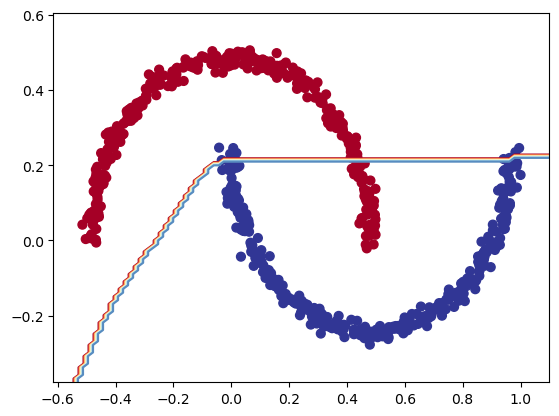

In [60]:
plot_decision_boundary(model_2, train_data_norm, train_labels)

## Training longer is proving positive results let's push it further

In [65]:
# Create the model

model_3 = keras.Sequential([
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss=keras.losses.BinaryCrossentropy(),
               optimizer=keras.optimizers.Adam(),
               metrics=['accuracy'])

history_3 = model_3.fit(train_data_norm, train_labels, epochs=240)

Epoch 1/240
22/22 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.7957
Epoch 2/240
22/22 [==============================] - 0s 3ms/step - loss: 0.6609 - accuracy: 0.8071
Epoch 3/240
22/22 [==============================] - 0s 3ms/step - loss: 0.6518 - accuracy: 0.8114
Epoch 4/240
22/22 [==============================] - 0s 3ms/step - loss: 0.6420 - accuracy: 0.8286
Epoch 5/240
22/22 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.8371
Epoch 6/240
22/22 [==============================] - 0s 2ms/step - loss: 0.6210 - accuracy: 0.8386
Epoch 7/240
22/22 [==============================] - 0s 2ms/step - loss: 0.6090 - accuracy: 0.8443
Epoch 8/240
22/22 [==============================] - 0s 4ms/step - loss: 0.5970 - accuracy: 0.8457
Epoch 9/240
22/22 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.8457
Epoch 10/240
22/22 [==============================] - 0s 2ms/step - loss: 0.5732 - accuracy: 0.8486
Epoch 11/

22/22 [==============================] - 0s 2ms/step - loss: 0.2748 - accuracy: 0.9057
Epoch 82/240
22/22 [==============================] - 0s 1ms/step - loss: 0.2737 - accuracy: 0.9029
Epoch 83/240
22/22 [==============================] - 0s 2ms/step - loss: 0.2726 - accuracy: 0.9029
Epoch 84/240
22/22 [==============================] - 0s 2ms/step - loss: 0.2716 - accuracy: 0.9014
Epoch 85/240
22/22 [==============================] - 0s 2ms/step - loss: 0.2704 - accuracy: 0.9043
Epoch 86/240
22/22 [==============================] - 0s 2ms/step - loss: 0.2693 - accuracy: 0.9029
Epoch 87/240
22/22 [==============================] - 0s 2ms/step - loss: 0.2684 - accuracy: 0.9014
Epoch 88/240
22/22 [==============================] - 0s 2ms/step - loss: 0.2674 - accuracy: 0.9014
Epoch 89/240
22/22 [==============================] - 0s 2ms/step - loss: 0.2665 - accuracy: 0.9014
Epoch 90/240
22/22 [==============================] - 0s 2ms/step - loss: 0.2656 - accuracy: 0.9029
Epoch 91/240


22/22 [==============================] - 0s 2ms/step - loss: 0.2251 - accuracy: 0.9000
Epoch 163/240
22/22 [==============================] - 0s 2ms/step - loss: 0.2245 - accuracy: 0.9000
Epoch 164/240
22/22 [==============================] - 0s 2ms/step - loss: 0.2242 - accuracy: 0.9043
Epoch 165/240
22/22 [==============================] - 0s 2ms/step - loss: 0.2241 - accuracy: 0.9043
Epoch 166/240
22/22 [==============================] - 0s 2ms/step - loss: 0.2239 - accuracy: 0.9029
Epoch 167/240
22/22 [==============================] - ETA: 0s - loss: 0.2612 - accuracy: 0.84 - 0s 2ms/step - loss: 0.2239 - accuracy: 0.9029
Epoch 168/240
22/22 [==============================] - 0s 2ms/step - loss: 0.2233 - accuracy: 0.9043
Epoch 169/240
22/22 [==============================] - 0s 1ms/step - loss: 0.2230 - accuracy: 0.9057
Epoch 170/240
22/22 [==============================] - 0s 2ms/step - loss: 0.2230 - accuracy: 0.9043
Epoch 171/240
22/22 [==============================] - 0s 2ms/s

Doing binary classification


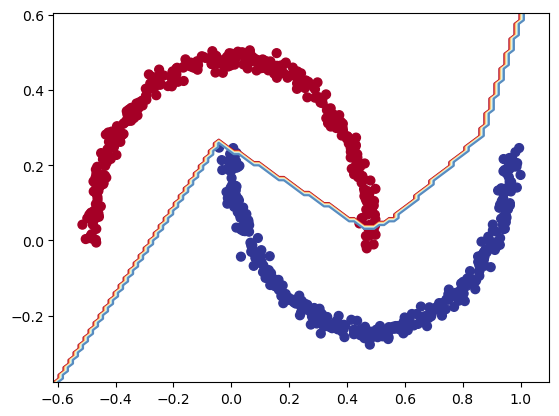

In [62]:
plot_decision_boundary(model_3, train_data_norm, train_labels)

# Even though the model performs extremely well on the training data at this point, the model is becoming overfit.
## The model should generalize well and as a result should occupy the whitespace between the moons to perform optimally

### Let's visualize the overfitting to see if we can pinpoint the hyperparameter causing the issue

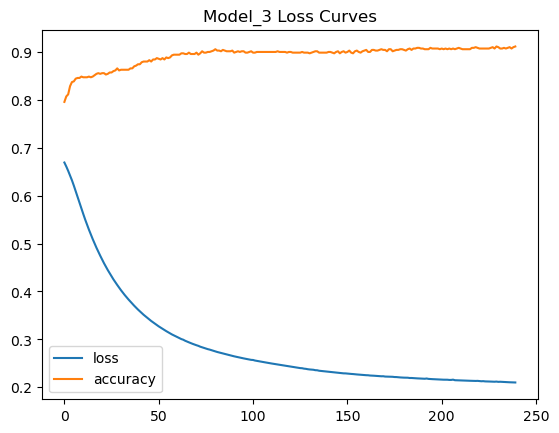

In [66]:
pd.DataFrame(history_3.history).plot()
plt.title("Model_3 Loss Curves")
plt.show()

### From what we can see, the accuracy doesn't suffer at the cost of loss, so perhaps the learning rate is worth looking at.

In [106]:
# Create the model

model_4 = keras.Sequential([
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_4.compile(loss=keras.losses.BinaryCrossentropy(),
               optimizer=keras.optimizers.Adam(lr=0.005),
               metrics=['accuracy'])



history_4 = model_4.fit(train_data_norm, train_labels, epochs=60, callbacks=[lr_scheduler])

Epoch 1/60
22/22 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5143
Epoch 2/60
22/22 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5900
Epoch 3/60
22/22 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.6271
Epoch 4/60
22/22 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.6271
Epoch 5/60
22/22 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.6329
Epoch 6/60
22/22 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.6371
Epoch 7/60
22/22 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.6400
Epoch 8/60
22/22 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.6457
Epoch 9/60
22/22 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.6514
Epoch 10/60
22/22 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.6586
Epoch 11/60
22/22 [

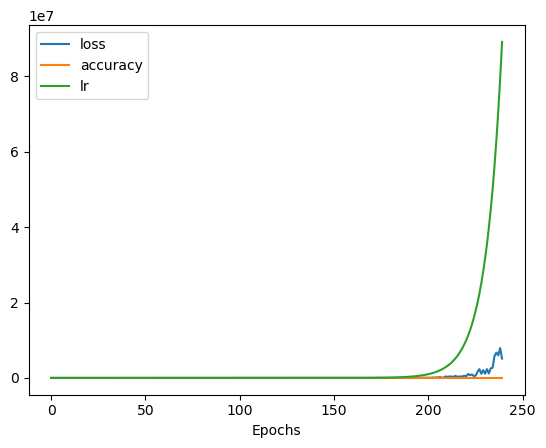

In [70]:
# Checkout the history

pd.DataFrame(history_4.history).plot()
plt.xlabel("Epochs")
plt.show()

### The learning rate is spiking too quickly, going to change the rate of change

In [103]:
# Create the model

model_5 = keras.Sequential([
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_5.compile(loss=keras.losses.BinaryCrossentropy(),
               optimizer=keras.optimizers.Adam(lr=0.01),
               metrics=['accuracy'])

history_5 = model_5.fit(train_data_norm, train_labels, epochs=240)

Epoch 1/240
22/22 [==============================] - 0s 2ms/step - loss: 0.6112 - accuracy: 0.7229
Epoch 2/240
22/22 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.8343
Epoch 3/240
22/22 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.8614
Epoch 4/240
22/22 [==============================] - 0s 2ms/step - loss: 0.3823 - accuracy: 0.8786
Epoch 5/240
22/22 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8814
Epoch 6/240
22/22 [==============================] - 0s 2ms/step - loss: 0.3196 - accuracy: 0.8900
Epoch 7/240
22/22 [==============================] - 0s 2ms/step - loss: 0.2952 - accuracy: 0.8986
Epoch 8/240
22/22 [==============================] - 0s 3ms/step - loss: 0.2795 - accuracy: 0.8957
Epoch 9/240
22/22 [==============================] - 0s 2ms/step - loss: 0.2677 - accuracy: 0.9029
Epoch 10/240
22/22 [==============================] - 0s 2ms/step - loss: 0.2568 - accuracy: 0.8986
Epoch 11/

22/22 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.9157
Epoch 84/240
22/22 [==============================] - 0s 2ms/step - loss: 0.1965 - accuracy: 0.9114
Epoch 85/240
22/22 [==============================] - 0s 2ms/step - loss: 0.2009 - accuracy: 0.9157
Epoch 86/240
22/22 [==============================] - 0s 2ms/step - loss: 0.1990 - accuracy: 0.9071
Epoch 87/240
22/22 [==============================] - 0s 2ms/step - loss: 0.1972 - accuracy: 0.9186
Epoch 88/240
22/22 [==============================] - 0s 2ms/step - loss: 0.1977 - accuracy: 0.9143
Epoch 89/240
22/22 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.9157
Epoch 90/240
22/22 [==============================] - 0s 5ms/step - loss: 0.1957 - accuracy: 0.9129
Epoch 91/240
22/22 [==============================] - 0s 3ms/step - loss: 0.1970 - accuracy: 0.9171
Epoch 92/240
22/22 [==============================] - 0s 4ms/step - loss: 0.1968 - accuracy: 0.9129
Epoch 93/240


Epoch 164/240
22/22 [==============================] - ETA: 0s - loss: 0.3607 - accuracy: 0.81 - 0s 2ms/step - loss: 0.1986 - accuracy: 0.9114
Epoch 165/240
22/22 [==============================] - 0s 2ms/step - loss: 0.1969 - accuracy: 0.9086
Epoch 166/240
22/22 [==============================] - 0s 2ms/step - loss: 0.1945 - accuracy: 0.9114
Epoch 167/240
22/22 [==============================] - 0s 2ms/step - loss: 0.1936 - accuracy: 0.9129
Epoch 168/240
22/22 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9057
Epoch 169/240
22/22 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.9043
Epoch 170/240
22/22 [==============================] - 0s 2ms/step - loss: 0.1977 - accuracy: 0.9043
Epoch 171/240
22/22 [==============================] - 0s 2ms/step - loss: 0.1944 - accuracy: 0.9157
Epoch 172/240
22/22 [==============================] - 0s 2ms/step - loss: 0.1961 - accuracy: 0.9071
Epoch 173/240
22/22 [============================

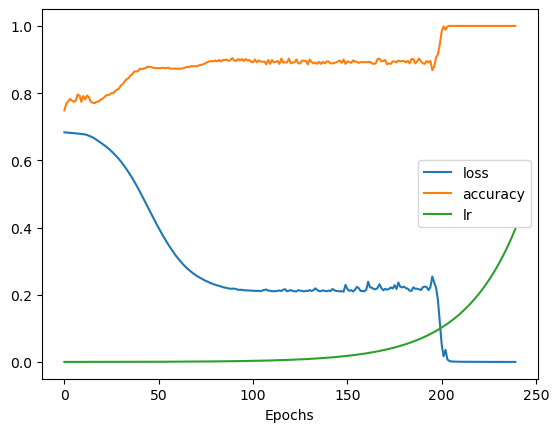

In [73]:
# Checkout the history

pd.DataFrame(history_4.history).plot()
plt.xlabel("Epochs")
plt.show()

In [75]:
# From the graph we can see that the optimal lr occurs somewhere around 210 epochs, so we will try that lr.
1e-4 * 32

0.0032

In [76]:
# Create the model

model_6 = keras.Sequential([
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_6.compile(loss=keras.losses.BinaryCrossentropy(),
               optimizer=keras.optimizers.Adam(lr = .003),
               metrics=['accuracy'])



history_6 = model_6.fit(train_data_norm, train_labels, epochs=210)

Epoch 1/210
22/22 [==============================] - 0s 2ms/step - loss: 0.6396 - accuracy: 0.6357
Epoch 2/210
22/22 [==============================] - 0s 13ms/step - loss: 0.6118 - accuracy: 0.6957
Epoch 3/210
22/22 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.7557
Epoch 4/210
22/22 [==============================] - 0s 2ms/step - loss: 0.5435 - accuracy: 0.7929
Epoch 5/210
22/22 [==============================] - 0s 2ms/step - loss: 0.5040 - accuracy: 0.7971
Epoch 6/210
22/22 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.8086
Epoch 7/210
22/22 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.8200
Epoch 8/210
22/22 [==============================] - 0s 2ms/step - loss: 0.3899 - accuracy: 0.8243
Epoch 9/210
22/22 [==============================] - 0s 2ms/step - loss: 0.3569 - accuracy: 0.8329
Epoch 10/210
22/22 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8457
Epoch 11

22/22 [==============================] - 0s 3ms/step - loss: 0.2506 - accuracy: 0.8814
Epoch 84/210
22/22 [==============================] - 0s 2ms/step - loss: 0.2510 - accuracy: 0.8829
Epoch 85/210
22/22 [==============================] - 0s 5ms/step - loss: 0.2509 - accuracy: 0.8814
Epoch 86/210
22/22 [==============================] - 0s 4ms/step - loss: 0.2508 - accuracy: 0.8814
Epoch 87/210
22/22 [==============================] - 0s 3ms/step - loss: 0.2509 - accuracy: 0.8814
Epoch 88/210
22/22 [==============================] - 0s 2ms/step - loss: 0.2504 - accuracy: 0.8843
Epoch 89/210
22/22 [==============================] - 0s 2ms/step - loss: 0.2506 - accuracy: 0.8800
Epoch 90/210
22/22 [==============================] - 0s 4ms/step - loss: 0.2503 - accuracy: 0.8829
Epoch 91/210
22/22 [==============================] - 0s 3ms/step - loss: 0.2513 - accuracy: 0.8786
Epoch 92/210
22/22 [==============================] - 0s 3ms/step - loss: 0.2522 - accuracy: 0.8857
Epoch 93/210


22/22 [==============================] - 0s 3ms/step - loss: 0.2508 - accuracy: 0.8829
Epoch 165/210
22/22 [==============================] - 0s 4ms/step - loss: 0.2517 - accuracy: 0.8814
Epoch 166/210
22/22 [==============================] - 0s 2ms/step - loss: 0.2550 - accuracy: 0.8786
Epoch 167/210
22/22 [==============================] - 0s 3ms/step - loss: 0.2522 - accuracy: 0.8843
Epoch 168/210
22/22 [==============================] - 0s 4ms/step - loss: 0.2508 - accuracy: 0.8800
Epoch 169/210
22/22 [==============================] - 0s 3ms/step - loss: 0.2504 - accuracy: 0.8814: 0s - loss: 0.2505 - accuracy: 0.88
Epoch 170/210
22/22 [==============================] - 0s 3ms/step - loss: 0.2510 - accuracy: 0.8829
Epoch 171/210
22/22 [==============================] - 0s 2ms/step - loss: 0.2518 - accuracy: 0.8800
Epoch 172/210
22/22 [==============================] - 0s 3ms/step - loss: 0.2547 - accuracy: 0.8800
Epoch 173/210
22/22 [==============================] - 0s 2ms/step - 

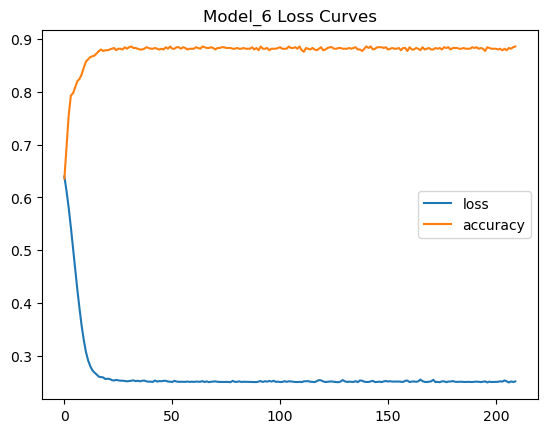

In [77]:
pd.DataFrame(history_6.history).plot()
plt.title("Model_6 Loss Curves")
plt.show()

In [79]:
model_6.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 0.2537 - accuracy: 0.9033


[0.2536630928516388, 0.903333306312561]

Doing binary classification


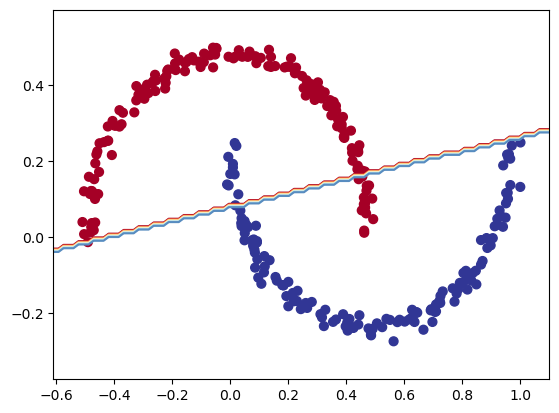

In [80]:
plot_decision_boundary(model_6, test_data_norm, test_labels)

# Unfortunately we're back to our original problem, let's see if we can get away from that with one of the original models

Doing binary classification


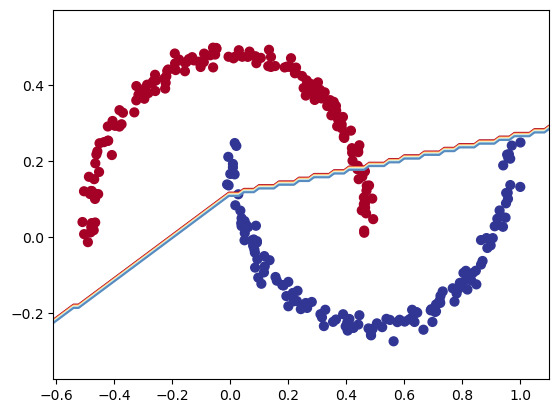

Doing binary classification


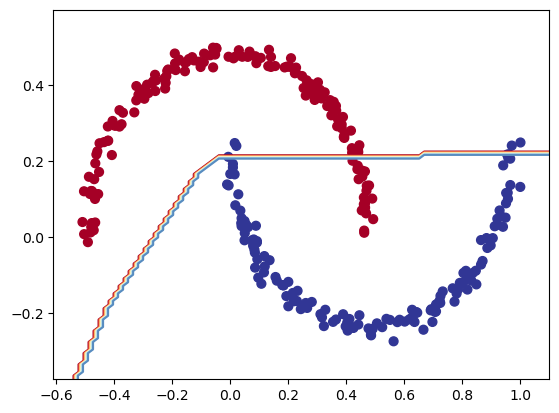

Doing binary classification


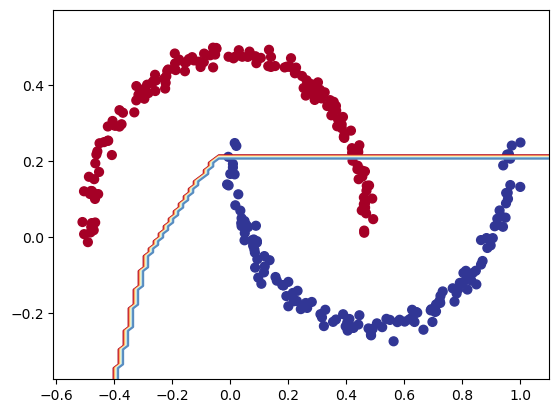

Doing binary classification


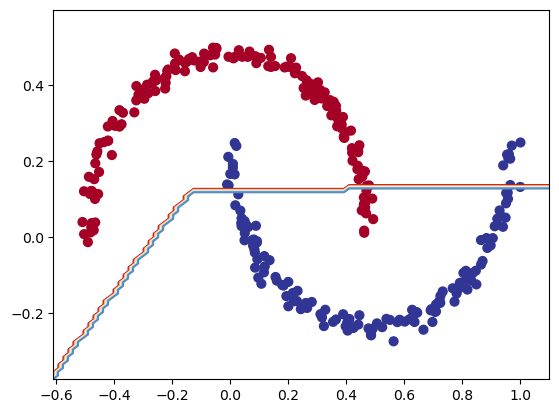

Doing binary classification


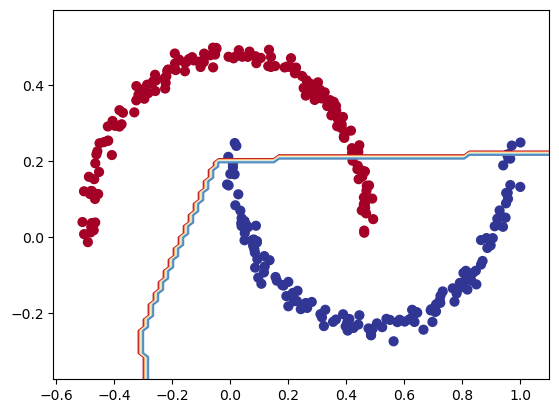

Doing binary classification


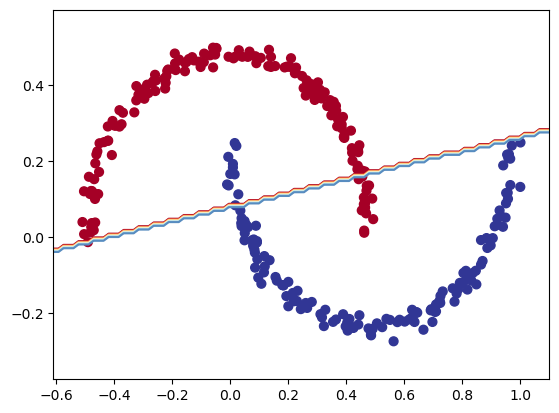

In [107]:
plot_decision_boundary(model_1, test_data_norm, test_labels)
plot_decision_boundary(model_2, test_data_norm, test_labels)
plot_decision_boundary(model_3, test_data_norm, test_labels)
plot_decision_boundary(model_4, test_data_norm, test_labels)
plot_decision_boundary(model_5, test_data_norm, test_labels)
plot_decision_boundary(model_6, test_data_norm, test_labels)

# None of the models are performing as we would want, let's go back to 4 (the most promising to get what we would want)

In [89]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=20):
    """
    Makes a confusion matrix to show the true/false positives/negatives
    """
    cm = confusion_matrix(y_true, tf.math.round(y_pred))
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # Normalizes our confusion matrix
    n_classes = cm.shape[0]

    #Prettifying it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # Shows a matrix in a figure window
    fig.colorbar(cax)
    
    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels=np.arange(cm.shape[0])

    # Label the axes
    ax.set(title='Confusion Matrix',
          xlabel="Predicted Label",
          ylabel= "True Label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes), 
           xticklabels=labels,
           yticklabels=labels)

    # Set x-axis labels to bootom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    threshold = (cm.max() + cm.min()) /2.

    # Plot the text on each cell

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{(cm[i, j])} ({cm_norm[i, j]*100:.1f}%)", 
                 horizontalalignment='center',
                color='white' if cm[i, j] > threshold else 'black',
                size=text_size)
    plt.show()

In [118]:
# Create the model by adding extra layers

model_7 = keras.Sequential([
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_7.compile(loss=keras.losses.BinaryCrossentropy(),
               optimizer=keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])



history_7 = model_7.fit(train_data_norm, train_labels, epochs=120)

Epoch 1/120
22/22 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.4857
Epoch 2/120
22/22 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.6186
Epoch 3/120
22/22 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.6557
Epoch 4/120
22/22 [==============================] - 0s 3ms/step - loss: 0.6664 - accuracy: 0.6743
Epoch 5/120
22/22 [==============================] - 0s 3ms/step - loss: 0.6411 - accuracy: 0.6914
Epoch 6/120
22/22 [==============================] - 0s 2ms/step - loss: 0.6012 - accuracy: 0.6871
Epoch 7/120
22/22 [==============================] - 0s 2ms/step - loss: 0.5468 - accuracy: 0.7900
Epoch 8/120
22/22 [==============================] - 0s 2ms/step - loss: 0.4831 - accuracy: 0.8043
Epoch 9/120
22/22 [==============================] - 0s 3ms/step - loss: 0.4261 - accuracy: 0.8143
Epoch 10/120
22/22 [==============================] - 0s 3ms/step - loss: 0.3761 - accuracy: 0.8286
Epoch 11/

22/22 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 84/120
22/22 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 85/120
22/22 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 86/120
22/22 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 87/120
22/22 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 88/120
22/22 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 89/120
22/22 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 90/120
22/22 [==============================] - 0s 2ms/step - loss: 9.7534e-04 - accuracy: 1.0000
Epoch 91/120
22/22 [==============================] - 0s 2ms/step - loss: 9.4167e-04 - accuracy: 1.0000
Epoch 92/120
22/22 [==============================] - 0s 2ms/step - loss: 8.9828e-04 - accuracy: 1.0000
E

Doing binary classification


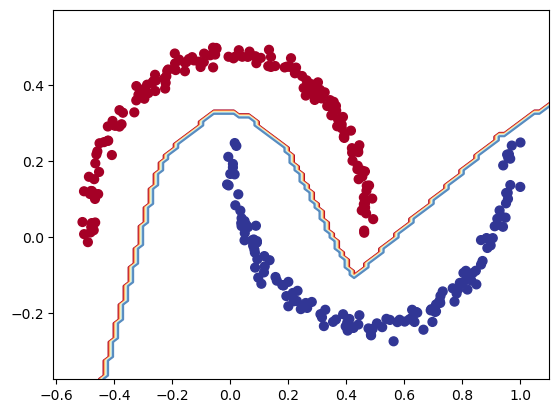

In [117]:
plot_decision_boundary(model_7, test_data_norm, test_labels)

In [131]:
test_pred = model_7.predict(test_data_norm)

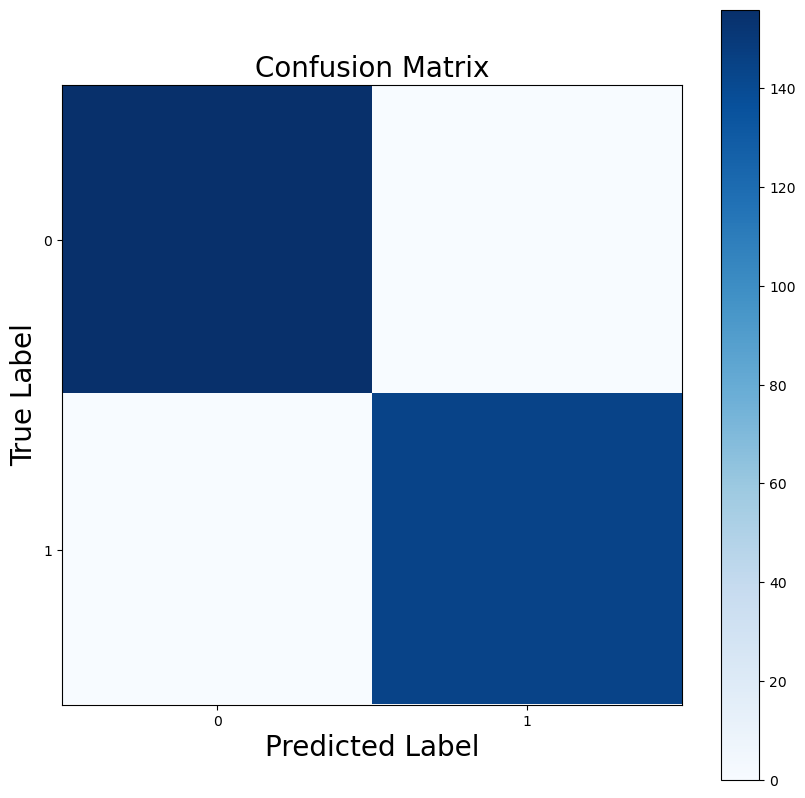

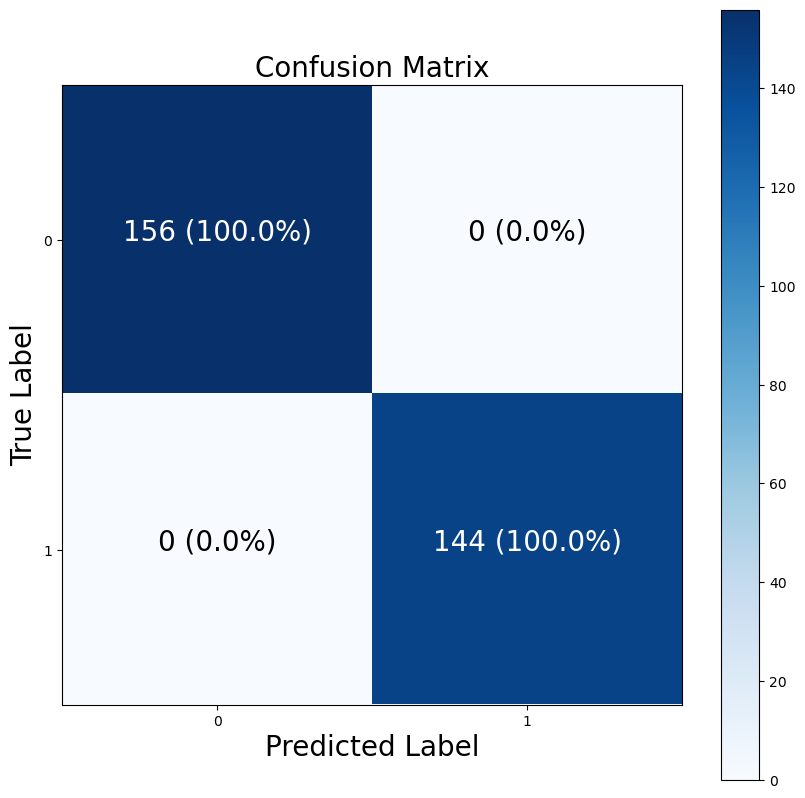

In [134]:
make_confusion_matrix(test_labels, test_pred)